In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from glob import glob
import os, time
import xavierUtils as xu
%autosave 1000000

Autosaving every 1000000 seconds


### Carregando dados:

In [3]:
anoFiles = glob('../dados/despesas/baixado_2019-04-12/Ano-*.csv')
anoFiles.sort()
fileDate = pd.to_datetime(pd.Series([time.ctime(os.path.getmtime(anoFiles[-1]))]))[0]

In [4]:
despesas = pd.concat([pd.read_csv(a, sep=';') for a in anoFiles], ignore_index=True)
# despesas['numDia'] = despesas.datEmissao.str.split('T').str.get(0).str.split('-').str.get(-1)
colNames = despesas.columns.values

### Dados faltantes:

In [7]:
xu.checkMissing(despesas)

Colunas com valores faltantes:
                       coluna            N      %
1                 ideCadastro         4639   0.16
2       nuCarteiraParlamentar         4639   0.16
4                        sgUF         4639   0.16
5                   sgPartido         4639   0.16
10  txtDescricaoEspecificacao  2.39275e+06  80.57
13                  txtNumero            4      0
15                 datEmissao       183850   6.19
16               vlrDocumento           17      0
22              txtPassageiro  2.15501e+06  72.56
23                  txtTrecho  2.14378e+06  72.19
25           numRessarcimento  1.58231e+06  53.28
26             vlrRestituicao  2.96908e+06  99.97


In [9]:
print ',  '.join(despesas.loc[despesas.ideCadastro.isnull()].txNomeParlamentar.unique())

LIDERANÇA DO PSDB,  LIDERANÇA DO PT,  PDT,  PROS,  SDD,  LID.GOV-CD,  PHS,  PSOL,  PTN,  LID.GOV-CN,  PODE,  AVANTE,  DEM,  PSD,  PTB


### Verificando identificadores de deputado/entidade:

In [11]:
def ColunasBiunivocas(base, colA, colB):
    temp = base[[colA,colB]].groupby(colA)[colB].nunique()
    return len(temp)==np.sum(temp)

In [12]:
print ColunasBiunivocas(despesas.loc[despesas.ideCadastro.isnull()==False],'ideCadastro','nuDeputadoId')
print ColunasBiunivocas(despesas,'ideCadastro','nuDeputadoId')
print ColunasBiunivocas(despesas,'txNomeParlamentar','nuDeputadoId')
print ColunasBiunivocas(despesas,'nuDeputadoId','txNomeParlamentar')

True
True
False
True


In [9]:
# Nome com duplicidade de DepId:
numIdByDep = despesas.groupby('txNomeParlamentar')['nuDeputadoId'].nunique()
numIdByDep.loc[numIdByDep>1]

txNomeParlamentar
ROGÉRIO SILVA    2
Name: nuDeputadoId, dtype: int64

In [8]:
# Id das lideranças:
despesas.loc[despesas.ideCadastro.isnull()].groupby('txNomeParlamentar')['nuDeputadoId'].unique()

txNomeParlamentar
AVANTE               [3175]
DEM                  [2713]
LID.GOV-CD           [2812]
LID.GOV-CN           [2757]
LIDERANÇA DO PSDB    [2442]
LIDERANÇA DO PT      [2439]
PDT                  [2715]
PHS                  [3122]
PODE                 [3172]
PROS                 [2865]
PSD                  [2725]
PSOL                 [3150]
PTB                  [2722]
PTN                  [3140]
SDD                  [2864]
Name: nuDeputadoId, dtype: object

In [ ]:
# CONCLUSÃO: nuDeputadoId é o melhor identificador, sendo que lideranças/partidos são identificados por falta de 
# idCadastro.

### Outras colunas:

In [14]:
xu.mapUnique(despesas)


txNomeParlamentar: 1420 unique values.
(sample) ALINE GURGEL,  ANGELIM,  CARLOS SOUZA,  CONCEIÇÃO SAMPAIO,  EDUARDO BOLSONARO,  EMANUEL PINHEIRO NETO,  EMILIANO JOSÉ,  ESPERIDIÃO AMIN,  FRANCO CARTAFINA,  HERCÍLIO COELHO DINIZ,  JOÃO LYRA,  JUNIOR MARZOLA,  MARCO MAIA,  MARCON,  REGUFFE,  ROSINHA DA ADEFAL,  TATICO,  TED CONTI,  WALTER PINHEIRO,  WLADIMIR COSTA

ideCadastro: 1407 unique values.
(sample) 64960.0,  73456.0,  74313.0,  74745.0,  74813.0,  141455.0,  159258.0,  160511.0,  160550.0,  171622.0,  174854.0,  178826.0,  178849.0,  178858.0,  178994.0,  204393.0,  204422.0,  204560.0,  204567.0,  nan

nuCarteiraParlamentar: 662 unique values.
(sample) 19.0,  96.0,  141.0,  169.0,  236.0,  276.0,  295.0,  342.0,  358.0,  363.0,  400.0,  455.0,  474.0,  492.0,  499.0,  540.0,  543.0,  615.0,  634.0,  657.0

nuLegislatura: 4 unique values.
2007,  2011,  2015,  2019

sgUF: 28 unique values.
(sample) AC,  AL,  AM,  AP,  BA,  CE,  ES,  GO,  MS,  MT,  PA,  PB,  PI,  PR,  RN,  RR,  RS,

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 7: ordinal not in range(128)

### Verificação dos valores:

In [23]:
# Valores negativos de documentos são bilhetes aéreos não utilizados, segundo o dadosabertos:
print ',  '.join(despesas.loc[despesas.vlrDocumento<0].txtDescricao.unique())

Emissão Bilhete Aéreo


In [24]:
# Existem valores líquidos negativos que não são passagens, e eles são estranhos.
print ',  '.join(despesas.loc[despesas.vlrLiquido<0].txtDescricao.unique())
#despesas.loc[(despesas.vlrLiquido<0) & 
#             (despesas.numSubCota!=999)].to_csv('../dados/despesas_com_vlrLiquido_estranhos.csv',
#                                               index=False, sep=';')

Emissão Bilhete Aéreo,  TELEFONIA,  COMBUSTÍVEIS E LUBRIFICANTES.,  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,  LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,  MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR


In [25]:
# Quando valor líquido existe, não existe valor de restituição:
despesas.loc[despesas.vlrLiquido!=0]['vlrRestituicao'].unique()

array([nan])

In [26]:
# Quando existe valor de restituição, não existe valor líquido:
print '# Restituições com valor líquido não-nulo:',\
len(despesas.loc[(despesas.vlrRestituicao.isnull()==False)&(despesas.vlrLiquido!=0)])

# Restituições com valor líquido não-nulo: 0


In [27]:
# Valores de restituição restituem quase tudo:
print ',  '.join(despesas.loc[(despesas.vlrRestituicao.isnull()==False)]['txtDescricao'].unique())

COMBUSTÍVEIS E LUBRIFICANTES.,  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,  LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES,  LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,  MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,  SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO,  CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.,  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,  TELEFONIA,  SERVIÇOS POSTAIS,  HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.,  LOCAÇÃO OU FRETAMENTO DE AERONAVES,  PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR,  PASSAGENS AÉREAS,  PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS,  ASSINATURA DE PUBLICAÇÕES,  SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.


In [15]:
despesas.loc[(despesas.nuDeputadoId==1810) & (despesas.numSubCota==3) & (despesas.numAno==2014) & 
            (despesas.vlrLiquido<0)]\
[['txNomeParlamentar','numAno','numMes','txtDescricao','vlrDocumento','vlrGlosa','vlrLiquido','vlrRestituicao']]

,txNomeParlamentar,numAno,numMes,txtDescricao,vlrDocumento,vlrGlosa,vlrLiquido,vlrRestituicao
1302948,DÉCIO LIMA,2014,6,COMBUSTÍVEIS E LUBRIFICANTES.,50.01,47.49,-44.97,NaN


In [16]:
despesas.loc[(despesas.nuDeputadoId==620) & (despesas.numSubCota==10) & (despesas.numAno==2011) & 
            (despesas.vlrLiquido==0.19)]\
[['txNomeParlamentar','numAno','numMes','txtDescricao','vlrDocumento','vlrGlosa','vlrLiquido','vlrRestituicao']]

,txNomeParlamentar,numAno,numMes,txtDescricao,vlrDocumento,vlrGlosa,vlrLiquido,vlrRestituicao


In [17]:
despesas.loc[(despesas.vlrLiquido<0) & (despesas.numSubCota!=999)][['nuDeputadoId','numSubCota','numAno']]

,nuDeputadoId,numSubCota,numAno
89021,620,10,2011
307915,2272,10,2011
307917,2272,10,2011
307918,2272,10,2011
1302948,1810,3,2014
1650825,1793,3,2015
1820235,2944,13,2015
2122842,2264,120,2016
2331501,1567,1,2017
2612449,3021,1,2017


### Cálculo do valor gasto

In [66]:
restituicoes  = despesas.groupby(['numAno','numMes'])['vlrRestituicao'].sum()
reembolsos    = despesas.groupby(['numAno','numMes'])['vlrLiquido'].sum()
gastosMensais = pd.DataFrame(restituicoes).join(reembolsos, how='outer')
gastosMensais['vlrGasto'] = gastosMensais.vlrLiquido - gastosMensais.vlrRestituicao

### Teste com valores

In [50]:
sopos = despesas.loc[despesas.vlrLiquido>0]

#### Evolução ao longo dos anos:

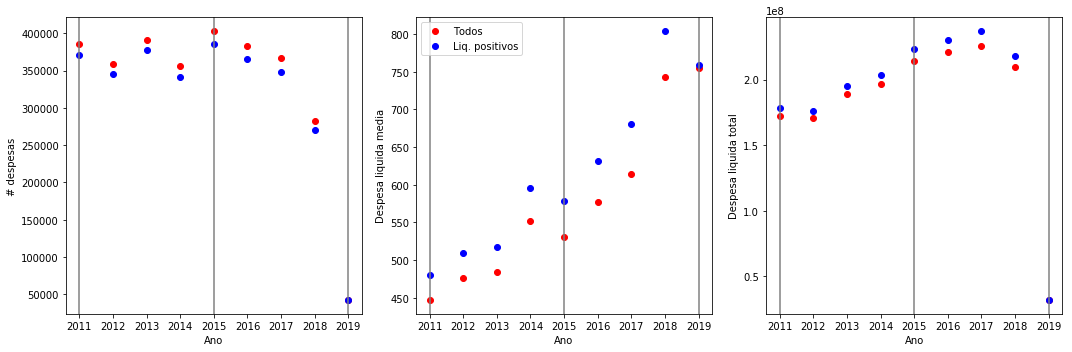

In [51]:
pl.figure(figsize=(15,5))

pl.subplot(1,3,1)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.size(), 'ro')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.size(), 'bo')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('# despesas')

pl.subplot(1,3,2)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.mean(), 'ro', label='Todos')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.mean(), 'bo', label='Liq. positivos')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('Despesa liquida media')
pl.legend(loc='upper left')

pl.subplot(1,3,3)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.sum(), 'ro')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.sum(), 'bo')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('Despesa liquida total')

pl.tight_layout()
pl.show()

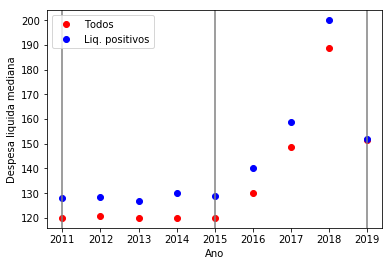

In [52]:
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.median(), 'ro', label='Todos')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').vlrLiquido.median(), 'bo', label='Liq. positivos')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('Despesa liquida mediana')
pl.legend(loc='upper left')

pl.show()

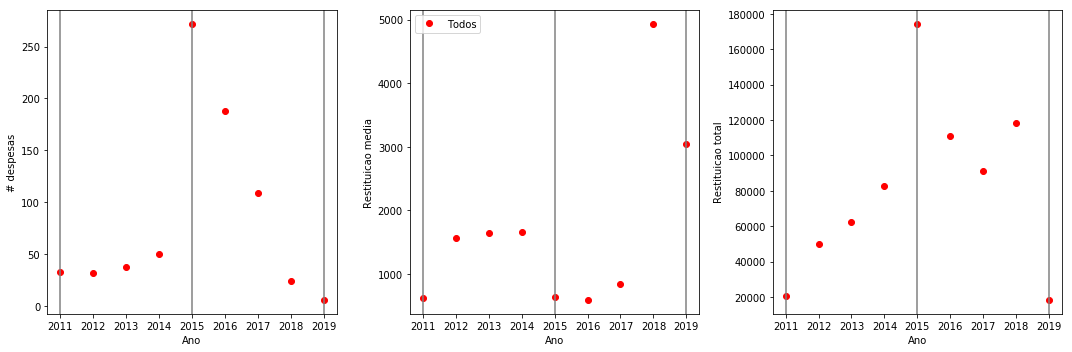

In [53]:
pl.figure(figsize=(15,5))

pl.subplot(1,3,1)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numAno').vlrRestituicao.size(), 'ro')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('# despesas')

pl.subplot(1,3,2)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numAno').vlrRestituicao.mean(), 'ro', label='Todos')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('Restituicao media')
pl.legend(loc='upper left')

pl.subplot(1,3,3)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numAno').vlrRestituicao.sum(), 'ro')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('Restituicao total')

pl.tight_layout()
pl.show()

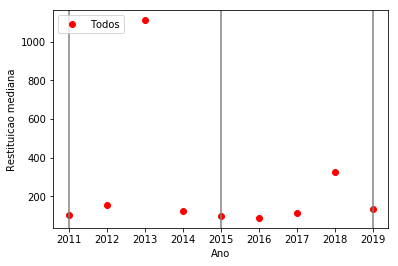

In [54]:
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numAno').vlrRestituicao.median(), 'ro', label='Todos')
pl.axvline(2011,color='gray')
pl.axvline(2015,color='gray')
pl.axvline(2019,color='gray')
pl.xlabel('Ano')
pl.ylabel('Restituicao mediana')
pl.legend(loc='upper left')

pl.show()

In [55]:
np.median(despesas.loc[(despesas.numAno==2013) & (despesas.vlrRestituicao.isnull()==False)]['vlrRestituicao'])

1111.795

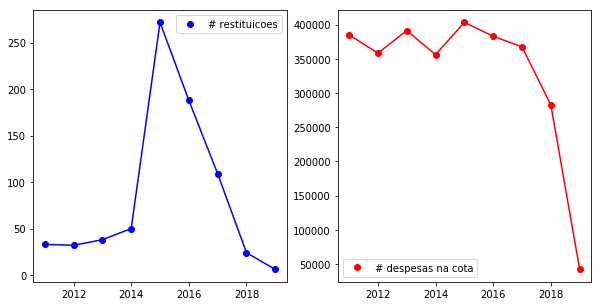

In [56]:
pl.figure(figsize=(10,5))
pl.subplot(1,2,1)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numAno').size(),'b-')
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numAno').size(),'bo',label='# restituicoes')
pl.legend()
pl.subplot(1,2,2)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').size(),'r-')
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numAno').size(),'ro',label='# despesas na cota')
pl.legend()
pl.show()

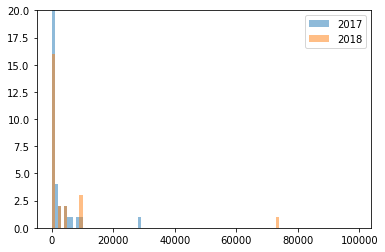

In [57]:
restBins = np.arange(0,100000,1000)
pl.hist(np.array(despesas.loc[(despesas.numAno==2017) & (despesas.vlrRestituicao.isnull()==False)]['vlrRestituicao']),
       bins=restBins, alpha=0.5, label='2017')
pl.hist(np.array(despesas.loc[(despesas.numAno==2018) & (despesas.vlrRestituicao.isnull()==False)]['vlrRestituicao']),
       bins=restBins, alpha=0.5,label='2018')
pl.legend()
pl.ylim([0,20])
pl.show()

In [58]:
# CONCLUSÃO: A mediana flutua muito em 2018 por que temos poucos valores de restituição nesse ano.

#### Maiores valores

In [ ]:
print despesas.vlrLiquido.min(), despesas.vlrLiquido.max()

In [ ]:
print despesas.vlrRestituicao.min(), despesas.vlrRestituicao.max()

In [ ]:
despesas.sort_values(by=['vlrLiquido'], ascending=False)\
[['txNomeParlamentar','numAno','numMes','txtDescricao','vlrDocumento','vlrGlosa','vlrLiquido','vlrRestituicao']]

In [ ]:
despesas.sort_values(by=['vlrRestituicao'], ascending=False)\
[['txNomeParlamentar','numAno','numMes','txtDescricao','vlrDocumento','vlrGlosa','vlrLiquido','vlrRestituicao']]

In [ ]:
# Vemos que os grandes valores são divulgações de atividade parlamentar e locação de veículos.

#### Sazonalidade

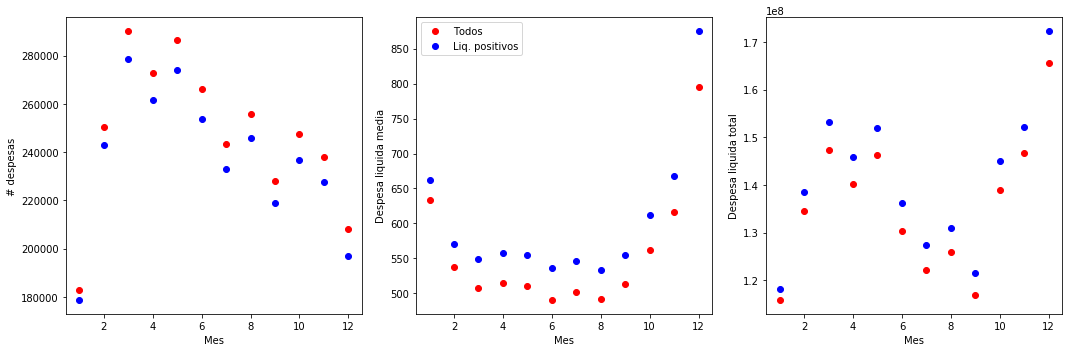

In [59]:
pl.figure(figsize=(15,5))

pl.subplot(1,3,1)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.size(), 'ro')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.size(), 'bo')
pl.xlabel('Mes')
pl.ylabel('# despesas')

pl.subplot(1,3,2)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.mean(), 'ro', label='Todos')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.mean(), 'bo', label='Liq. positivos')
pl.xlabel('Mes')
pl.ylabel('Despesa liquida media')
pl.legend(loc='upper left')

pl.subplot(1,3,3)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.sum(), 'ro')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.sum(), 'bo')
pl.xlabel('Mes')
pl.ylabel('Despesa liquida total')

pl.tight_layout()
pl.show()

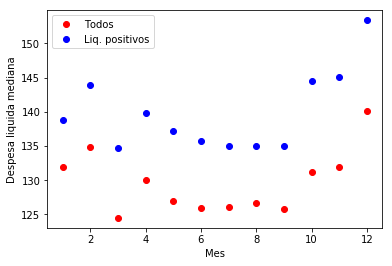

In [60]:
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.median(), 'ro', label='Todos')
pl.plot(sopos.loc[(despesas.vlrRestituicao.isnull()==True)].groupby('numMes').vlrLiquido.median(), 'bo', label='Liq. positivos')
pl.xlabel('Mes')
pl.ylabel('Despesa liquida mediana')
pl.legend(loc='upper left')

pl.show()

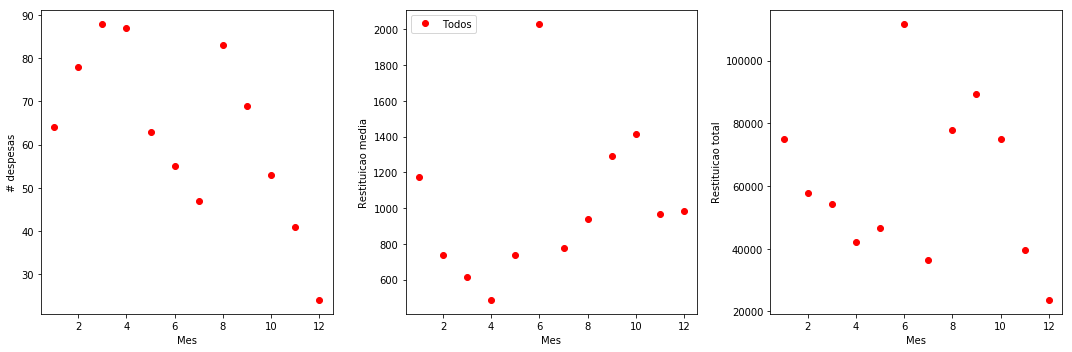

In [61]:
pl.figure(figsize=(15,5))

pl.subplot(1,3,1)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numMes').vlrRestituicao.size(), 'ro')
pl.xlabel('Mes')
pl.ylabel('# despesas')

pl.subplot(1,3,2)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numMes').vlrRestituicao.mean(), 'ro', label='Todos')
pl.xlabel('Mes')
pl.ylabel('Restituicao media')
pl.legend(loc='upper left')

pl.subplot(1,3,3)
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numMes').vlrRestituicao.sum(), 'ro')
pl.xlabel('Mes')
pl.ylabel('Restituicao total')

pl.tight_layout()
pl.show()

In [ ]:
pl.plot(despesas.loc[(despesas.vlrRestituicao.isnull()!=True)].groupby('numMes').vlrRestituicao.median(), 'ro', label='Todos')
pl.xlabel('Mes')
pl.ylabel('Restituicao mediana')
pl.legend(loc='upper left')

pl.show()

### Deflacionando e juntando valores por mês e ano

In [62]:
#### ATENÇÃO!!! É preciso corrigir o último mês dos gastos pelo número de dias existentes e 
####            extrapolar o IPCA para os meses que não existem !!

In [63]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Calcula despesas totais e agrupa por ano e mês:

restituicoes  = despesas.groupby(['numAno','numMes'])['vlrRestituicao'].sum()
reembolsos    = despesas.groupby(['numAno','numMes'])['vlrLiquido'].sum()
gastosMensais = pd.DataFrame(restituicoes).join(reembolsos, how='outer')
dTotal = gastosMensais.vlrLiquido - gastosMensais.vlrRestituicao

dNum   = despesas.groupby(['numAno','numMes']).size()
mesSeq = np.arange(1,len(dTotal)+1)
dTotalArr = np.array(dTotal)
dNumArr = np.array(dNum)

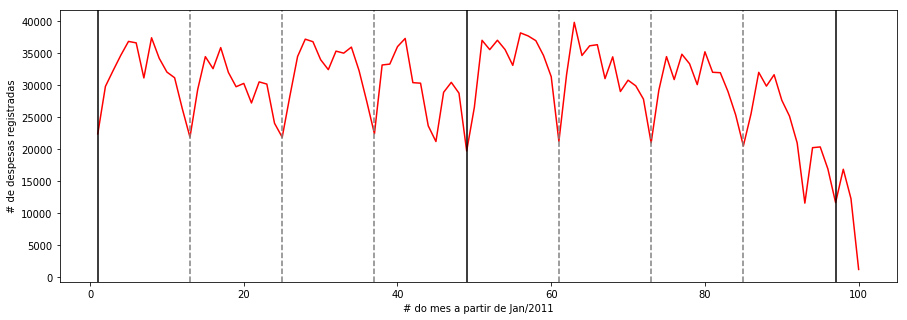

In [72]:
pl.figure(figsize=(15,5))
pl.plot(mesSeq,dNumArr,'r-')
pl.axvline(0*12+1,color='black',linestyle='-')
pl.axvline(1*12+1,color='gray',linestyle='--')
pl.axvline(2*12+1,color='gray',linestyle='--')
pl.axvline(3*12+1,color='gray',linestyle='--')
pl.axvline(4*12+1,color='black',linestyle='-')
pl.axvline(5*12+1,color='gray',linestyle='--')
pl.axvline(6*12+1,color='gray',linestyle='--')
pl.axvline(7*12+1,color='gray',linestyle='--')
pl.axvline(8*12+1,color='black',linestyle='-')
pl.xlabel('# do mes a partir de Jan/2011')
pl.ylabel('# de despesas registradas')
pl.show()

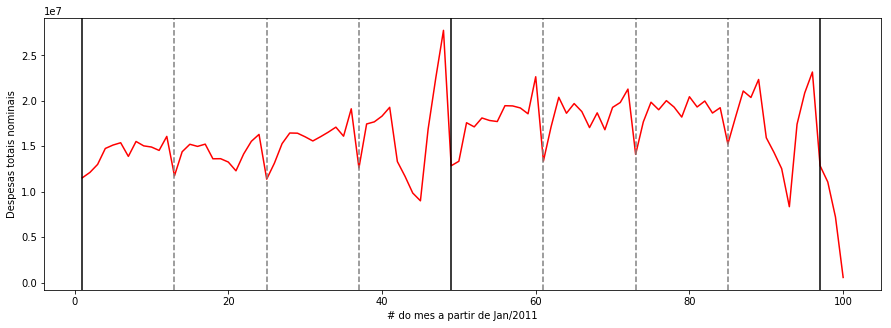

In [73]:
pl.figure(figsize=(15,5))
pl.plot(mesSeq,dTotalArr,'r-')
pl.axvline(0*12+1,color='black',linestyle='-')
pl.axvline(1*12+1,color='gray',linestyle='--')
pl.axvline(2*12+1,color='gray',linestyle='--')
pl.axvline(3*12+1,color='gray',linestyle='--')
pl.axvline(4*12+1,color='black',linestyle='-')
pl.axvline(5*12+1,color='gray',linestyle='--')
pl.axvline(6*12+1,color='gray',linestyle='--')
pl.axvline(7*12+1,color='gray',linestyle='--')
pl.axvline(8*12+1,color='black',linestyle='-')
pl.xlabel('# do mes a partir de Jan/2011')
pl.ylabel('Despesas totais nominais')
pl.show()

In [74]:
# Carregando ipca:
ipca = pd.read_csv('../dados/economicos/ipca_2019-04-15.csv')
ipca = ipca.reindex(index=ipca.index[::-1]).reset_index(drop=True)
ipcaIdx = ipca.loc[ipca.ano>=2011].indice
ipcaMesSeq = np.arange(1,1+len(ipcaIdx))

In [75]:
# Ajuste linear ao IPCA:
linReg = linear_model.LinearRegression()
linReg.fit(np.transpose([ipcaMesSeq]),ipcaIdx)
ipcaPred = linReg.predict(np.transpose([ipcaMesSeq]))

In [76]:
# Extrapola o IPCA para os meses que faltam:
ipcaExtrapMes = np.arange(ipcaMesSeq[-1],1+ipcaMesSeq[-1]+len(dTotalArr)-len(ipcaMesSeq))
ipcaExtrapIdx = linReg.predict(np.transpose([ipcaExtrapMes]))
ipcaExtrapIdx = ipcaExtrapIdx - ipcaExtrapIdx[0] + ipcaIdx.iloc[-1]

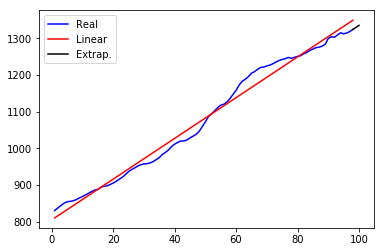

In [77]:
pl.plot(ipcaMesSeq,ipcaIdx,'b-',label='Real')
pl.plot(ipcaMesSeq,ipcaPred,'r-',label='Linear')
pl.plot(ipcaExtrapMes,ipcaExtrapIdx,'k-',label='Extrap.')
pl.legend()
pl.show()

In [78]:
ipcaFinal = np.concatenate((ipcaIdx,ipcaExtrapIdx[1:]))

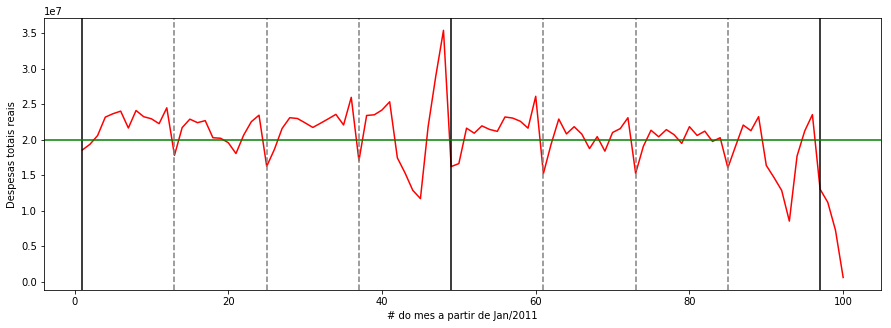

In [79]:
pl.figure(figsize=(15,5))
pl.plot(mesSeq,dTotalArr/ipcaFinal*ipcaFinal[-1],'r-')
pl.axvline(0*12+1,color='black',linestyle='-')
pl.axvline(1*12+1,color='gray',linestyle='--')
pl.axvline(2*12+1,color='gray',linestyle='--')
pl.axvline(3*12+1,color='gray',linestyle='--')
pl.axvline(4*12+1,color='black',linestyle='-')
pl.axvline(5*12+1,color='gray',linestyle='--')
pl.axvline(6*12+1,color='gray',linestyle='--')
pl.axvline(7*12+1,color='gray',linestyle='--')
pl.axvline(8*12+1,color='black',linestyle='-')
pl.xlabel('# do mes a partir de Jan/2011')
pl.ylabel('Despesas totais reais')
pl.axhline(2e7,color='g')
pl.show()

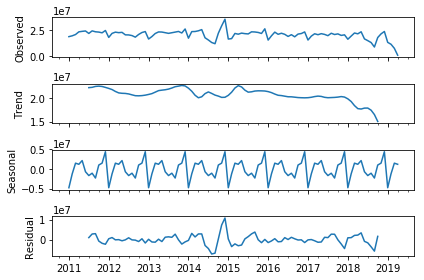

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
gastosTS = pd.Series(dTotalArr, index=pd.date_range(start='2011-01-01',periods=100,freq='M'))
result = seasonal_decompose(gastosTS/ipcaFinal*ipcaFinal[-1], model='additive')
result.plot()
pl.show()

### Gastos por categoria

In [103]:
despesas.groupby('numSubCota')['txtDescricao'].unique().apply(lambda x: x[0])

numSubCota
1      MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
3                          COMBUSTÍVEIS E LUBRIFICANTES.
4          CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.
5                   DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
8      SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...
9                                       PASSAGENS AÉREAS
10                                             TELEFONIA
11                                      SERVIÇOS POSTAIS
12                             ASSINATURA DE PUBLICAÇÕES
13            FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
14     HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...
15     LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...
119                   LOCAÇÃO OU FRETAMENTO DE AERONAVES
120        LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES
121                 LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES
122            SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO
123          PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS
137    PARTICIPAÇÃO 

In [149]:
hyperClasse = dict(zip(sorted([  1,   3,   5,   9,  13,  14,  15,   4,  10,  11, 999,   8,  12,
       122, 120, 119, 121, 123, 137]),['Escritorio de apoio','Transporte terrestre','Informacao',
                                                     'Divulgacao','Outros', 'Transporte aereo','Comunicacao',
                                                     'Comunicacao','Informacao','Alimentacao','Hospedagem',
                                                     'Transporte terrestre','Transporte aereo','Transporte terrestre',
                                                     'Transporte terrestre', 'Transporte terrestre', 
                                                     'Transporte terrestre', 'Informacao','Transporte aereo']))

In [150]:
anoBase = 2017
nGastos       = despesas.loc[despesas.numAno==anoBase].groupby('numSubCota').size()
restituicoes  = despesas.loc[despesas.numAno==anoBase].groupby('numSubCota')['vlrRestituicao'].sum()
reembolsos    = despesas.loc[despesas.numAno==anoBase].groupby('numSubCota')['vlrLiquido'].sum()
gastosByTipo  = pd.DataFrame(restituicoes).join(reembolsos, how='outer')

In [151]:
nGastos       = despesas.groupby('numSubCota').size()
restituicoes  = despesas.groupby('numSubCota')['vlrRestituicao'].sum()
reembolsos    = despesas.groupby('numSubCota')['vlrLiquido'].sum()
gastosByTipo  = pd.DataFrame(restituicoes).join(reembolsos, how='outer')

gastosByTipo['fracRestituido'] = gastosByTipo.vlrRestituicao/gastosByTipo.vlrLiquido
gastosByTipo['vlrFinal']       = gastosByTipo.vlrLiquido - gastosByTipo.vlrRestituicao
gastosByTipo['fracTotal'] = gastosByTipo.vlrFinal / gastosByTipo.vlrFinal.sum()
gastosByTipo['hyperClasse'] = np.vectorize(hyperClasse.get)(gastosByTipo.index.values)

In [157]:
gastosByTipo.groupby('hyperClasse')['fracTotal'].sum()

hyperClasse
Alimentacao             0.007975
Comunicacao             0.098983
Divulgacao              0.224173
Escritorio de apoio     0.103205
Hospedagem              0.009630
Informacao              0.096125
Outros                  0.007029
Transporte aereo        0.244879
Transporte terrestre    0.208001
Name: fracTotal, dtype: float64

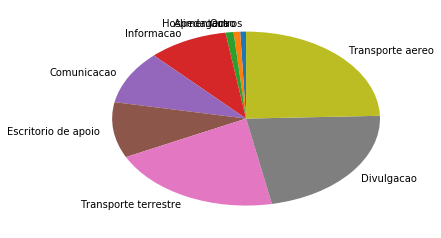

In [167]:
fracTipoGasto = gastosByTipo.groupby('hyperClasse')['fracTotal'].sum().sort_values(ascending=True)
pl.pie(fracTipoGasto.values, startangle=90, labels=fracTipoGasto.index.values)
pl.show()

# Lixo

In [ ]:
# Função que seria para marcar anos e meses especiais, abandonada:
def seasonMarks(mes0,ano0,mes1,ano1):
    nSteps = (ano1-ano0)*12 + (mes1-mes0)

In [63]:
despesas.numDia.fillna('01', inplace=True)

In [92]:
ultimasD = despesas.iloc[-500000:]
ultimasD = pd.to_datetime(ultimasD.numAno*10000+ultimasD.numMes*100+ultimasD.numDia.astype(int),
                          format='%Y%m%d', errors='coerce')
ultimasD.loc[ultimasD.isnull()==False].sort_values().iloc[-1]

Timestamp('2019-04-30 00:00:00')